In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import bct
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from nilearn import plotting
from os.path import join

In [2]:
data_dir = '/Users/katherine/Dropbox/Projects/physics-retrieval/data/output'
fig_dir = '/Users/katherine/Dropbox/Projects/physics-retrieval/figures'
shen_nii = '/Users/katherine/Dropbox/Projects/physics-retrieval/shen2015_2mm_268_parcellation.nii.gz'


In [3]:
def grab_corr(subjects, nodes, task, condition, session, atlas, verbose=False):
    errors = pd.Series(index=subjects)
    corrmats = []
    for subject in subjects:
        try:
            if condition != None:
                corrmat = np.genfromtxt(join(data_dir, '{0}-session-{1}_{2}-{3}_{4}-corrmat.csv'.format(subject, 
                                                                                                        session, 
                                                                                                        task, 
                                                                                                        condition, 
                                                                                                        atlas)),
                                        delimiter=' ')
            else:
                corrmat = np.genfromtxt(join(data_dir, '{0}-session-{1}-{2}_network_corrmat_{3}.csv'.format(subject, 
                                                                                                        session, 
                                                                                                        task, 
                                                                                                        atlas)),
                                        delimiter=',')
            corrmats.append(corrmat)
        except Exception as e:
            if verbose:
                print(subject, session, task, condition, atlas, 'error.')
            else:
                pass
            errors[subject] = e
    return corrmats, errors

In [4]:
def nbs_and_graphs(corr1, corr2, p_thresh, k, atlas, verbose):
    coordinates = plotting.find_parcellation_cut_coords(labels_img=atlas)
    corr1 = np.asarray(corr1, dtype='float')
    corr2 = np.asarray(corr2, dtype='float')

    if corr1.shape[0] != corr1.shape[1]:
        corr1 = np.moveaxis(corr1, 0, -1)
        corr2 = np.moveaxis(corr2, 0, -1)
    
    thresh = stats.t.isf(p_thresh, corr1.shape[2])
    pval, adj, _ = bct.nbs_bct(corr1,
                               corr2,
                               thresh,
                               k=k,
                               tail='both',
                               paired=True,
                               verbose=verbose)
    print(pval)
    gridkw = dict(width_ratios=[1,2])
    fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw=gridkw, figsize=(15,4))

    g = sns.heatmap(adjs, square=True, ax=ax1, cmap='Greys')
    h = plotting.plot_connectome_strength(adj, node_coords=coordinates, cmap='YlGnBu', axes=ax2)

    plt.show()
    return pval, adj, fig

In [5]:
bx_dir = '/Users/katherine/Dropbox/Projects/physics-retrieval/data/rescored'
b_df = pd.read_csv(join(bx_dir, 'non-brain-data.csv'), index_col=0, header=0)

b_df.drop(['GPA', 'Age', 'Handedness', 'Strt.Level', 'RetrPhyAcc1',
       'Mean Correct RT Pre', 'RetrPhyAcc2', 'Mean Correct RT Post',
       'FCIPhyAcc1', 'FCIPhyAcc2', 'GID Pre', 'GID Post',
       'deltaRetrPhyAcc', 'deltaFCIPhyAcc', 'Phy48Grade', 'Sex', 'Ethnic.Grp',
       'Class.Type', 'Subject', 'Lec', 'SexXClass', 'VCI1XClass',
       'VCI2XClass', 'deltaVCIXClass', 'PRI1XClass', 'PRI2XClass',
       'deltaPRIXClass', 'WMI1XClass', 'WMI2XClass', 'deltaWMIXClass',
       'PSI1XClass', 'PSI2XClass', 'deltaPSIXClass', 'FSIQ1XClass',
       'FSIQ2XClass', 'deltaFSIQXClass', 'VCI1XClassXSex', 'VCI1XSex',
       'VCI2XClassXSex', 'VCI2XSex', 'deltaVCIXClassXSex', 'deltaVCIXSex',
       'PRI1XClassXSex', 'PRI1XSex', 'PRI2XClassXSex', 'PRI2XSex',
       'deltaPRIXClassXSex', 'deltaPRIXSex', 'WMI1XClassXSex', 'WMI1XSex',
       'WMI2XClassXSex', 'WMI2XSex', 'deltaWMIXClassXSex', 'deltaWMIXSex',
       'PSI1XClassXSex', 'PSI1XSex', 'PSI2XClassXSex', 'PSI2XSex',
       'deltaPSIXClassXSex', 'deltaPSIXSex', 'FSIQ1XClassXSex', 'FSIQ1XSex',
       'FSIQ2XClassXSex', 'FSIQ2XSex', 'deltaFSIQXClassXSex', 'deltaFSIQXSex'], axis=1, inplace=True)

In [6]:
husl_pal = sns.husl_palette(h=0, n_colors=268)
crayons_l = sns.crayon_palette(['Vivid Tangerine', 'Cornflower'])
crayons_d = sns.crayon_palette(['Brick Red', 'Midnight Blue'])
grays = sns.light_palette('#999999', n_colors=3, reverse=True)

f_2 = sns.crayon_palette(['Red Orange', 'Vivid Tangerine'])
m_2 = sns.crayon_palette(['Cornflower', 'Cerulean'])

In [19]:
f_subs = b_df[b_df['F'] == 1].index
m_subs = b_df[b_df['F'] == 0].index
a_subs = b_df[b_df['Mod'] == 1].index
l_subs = b_df[b_df['Mod'] == 0].index

fmod = b_df[b_df['F'] == 1]
af = fmod[fmod['Mod'] == 1]
af_subs = af.index

flec = b_df[b_df['F'] == 1]
lf = fmod[fmod['Mod'] == 0]
lf_subs = lf.index

mmod = b_df[b_df['F'] == 0]
am = mmod[mmod['Mod'] == 1]
am_subs = am.index

mlec = b_df[b_df['F'] == 0]
lm = mlec[mlec['Mod'] == 0]
lm_subs = lm.index

In [20]:
print(af_subs, lf_subs, am_subs, lm_subs)

Int64Index([104, 211, 214, 321, 324, 326, 339, 342, 344, 345, 346, 350, 455,
            460, 465, 502, 572, 573, 582, 584, 589, 590, 591, 618, 623, 631],
           dtype='int64') Int64Index([101, 107, 108, 213, 216, 218, 320, 322, 323, 328, 329, 330, 331,
            333, 343, 348, 349, 452, 456, 458, 462, 466, 501, 574, 576, 583,
            588, 592, 593, 605, 614, 615, 616, 625, 634],
           dtype='int64') Int64Index([102, 106, 109, 215, 325, 332, 334, 335, 336, 337, 338, 340, 341,
            347, 451, 459, 469, 503, 571, 575, 578, 580, 585, 594, 595, 596,
            604, 609, 610, 612, 620, 621, 622, 626, 628, 629, 630, 633],
           dtype='int64') Int64Index([103, 105, 110, 212, 217, 219, 327, 453, 457, 461, 463, 464, 467,
            468, 470, 577, 579, 581, 586, 587, 597, 598, 606, 607, 608, 611,
            613, 617, 619, 624, 627],
           dtype='int64')


## Physics knowledge task
1. All students: physics > general
2. Female students: physics > general
    1. All
    2. Active learning
    3. Traditional lecture
3. Male students: physics > general
    1. All
    2. Active learning
    3. Traditional lecture
4. Active learning: physics > general
5. Traditional lecture: physics > general

max component size is 9706
estimating null distribution with 1000 permutations
permutation 0 of 1000.  p-value so far is 0.000
permutation 100 of 1000.  p-value so far is 0.010
permutation 200 of 1000.  p-value so far is 0.005
permutation 300 of 1000.  p-value so far is 0.013
permutation 400 of 1000.  p-value so far is 0.017
permutation 500 of 1000.  p-value so far is 0.018
permutation 600 of 1000.  p-value so far is 0.015
permutation 700 of 1000.  p-value so far is 0.013
permutation 800 of 1000.  p-value so far is 0.014
permutation 900 of 1000.  p-value so far is 0.012
permutation 999 of 1000.  p-value so far is 0.011
[0.011]


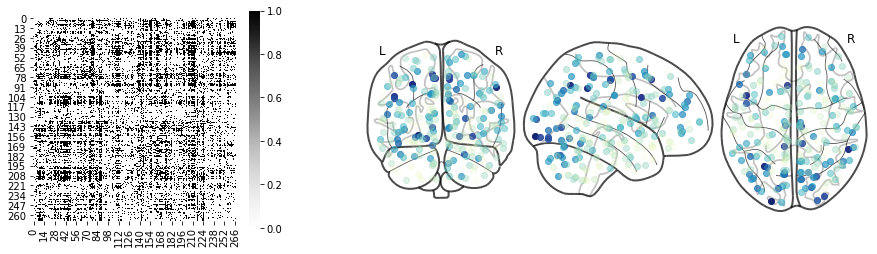

In [73]:
subjects = b_df.index

phy_c, phy_e = grab_corr(subjects,
                         nodes=None, 
                         task='retr', 
                         condition='Physics',
                         session='1',
                         atlas='shen2015')

gen_c, gen_e = grab_corr(subjects,
                         nodes=None,
                         task='retr',
                         condition='General',
                         session='1',
                         atlas='shen2015')

p, adj, fig = nbs_and_graphs(gen_c, phy_c, p_thresh=0.05 , k=1000, atlas=shen_nii, verbose=False)

In [90]:
centrality = bct.betweenness_bin(adj)
centrality_df = pd.Series(centrality, index=np.arange(1,269), name='betweenness centrality')
centrality_df.sort_values()
centrality_df.to_csv(join(data_dir, 'nbs', 'all_students-retr-centrality.csv'))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


In [79]:
adjacency = pd.DataFrame(adj, columns=np.arange(1,269), index=np.arange(1,269))
adjacency.to_csv(join(data_dir, 'nbs', 'all_students-retr.csv'))

In [89]:
fig.savefig(join(fig_dir, 'nbs-all_students-retr.png'), dpi=300)

In [91]:
#all female subjects
subjects = f_subs

phy_c, phy_e = grab_corr(subjects,
                         nodes=None, 
                         task='retr', 
                         condition='Physics',
                         session='1',
                         atlas='shen2015')

gen_c, gen_e = grab_corr(subjects,
                         nodes=None,
                         task='retr',
                         condition='General',
                         session='1',
                         atlas='shen2015')

p, adj = nbs_and_graphs(gen_c, phy_c, p_thresh=0.05 , k=1000, atlas=shen_nii, verbose=False)

adjacency = pd.DataFrame(adj, columns=np.arange(1,269), index=np.arange(1,269))
adjacency.to_csv(join(data_dir, 'nbs', 'female_students-retr.csv'))
fig.savefig(join(fig_dir, 'nbs-female_students-retr.png'), dpi=300)
centrality = bct.betweenness_bin(adj)
centrality_df = pd.Series(centrality, index=np.arange(1,269), name='betweenness centrality')
centrality_df.to_csv(join(data_dir, 'nbs', 'female_students-retr-centrality.csv'))
centrality_df.sort_values()

max component size is 7006
estimating null distribution with 1000 permutations
permutation 0 of 1000.  p-value so far is 0.000
permutation 100 of 1000.  p-value so far is 0.050
permutation 200 of 1000.  p-value so far is 0.040
permutation 300 of 1000.  p-value so far is 0.040
permutation 400 of 1000.  p-value so far is 0.032


KeyboardInterrupt: 

In [ ]:
#all male subjects
subjects = m_subs

phy_c, phy_e = grab_corr(subjects,
                         nodes=None, 
                         task='retr', 
                         condition='Physics',
                         session='1',
                         atlas='shen2015')

gen_c, gen_e = grab_corr(subjects,
                         nodes=None,
                         task='retr',
                         condition='General',
                         session='1',
                         atlas='shen2015')

p, adj = nbs_and_graphs(gen_c, phy_c, p_thresh=0.05 , k=1000, atlas=shen_nii, verbose=False)

adjacency = pd.DataFrame(adj, columns=np.arange(1,269), index=np.arange(1,269))
adjacency.to_csv(join(data_dir, 'nbs', 'male_students-retr.csv'))
fig.savefig(join(fig_dir, 'nbs-male_students-retr.png'), dpi=300)
centrality = bct.betweenness_bin(adj)
centrality_df = pd.Series(centrality, index=np.arange(1,269), name='betweenness centrality')
centrality_df.to_csv(join(data_dir, 'nbs', 'male_students-retr-centrality.csv'))
centrality_df.sort_values()

In [ ]:
#all modeling subjects
subjects = a_subs

phy_c, phy_e = grab_corr(subjects,
                         nodes=None, 
                         task='retr', 
                         condition='Physics',
                         session='1',
                         atlas='shen2015')

gen_c, gen_e = grab_corr(subjects,
                         nodes=None,
                         task='retr',
                         condition='General',
                         session='1',
                         atlas='shen2015')

p, adj = nbs_and_graphs(gen_c, phy_c, p_thresh=0.05 , k=1000, atlas=shen_nii, verbose=False)

adjacency = pd.DataFrame(adj, columns=np.arange(1,269), index=np.arange(1,269))
adjacency.to_csv(join(data_dir, 'nbs', 'modeling_students-retr.csv'))
fig.savefig(join(fig_dir, 'nbs-modeling_students-retr.png'), dpi=300)
centrality = bct.betweenness_bin(adj)
centrality_df = pd.Series(centrality, index=np.arange(1,269), name='betweenness centrality')
centrality_df.to_csv(join(data_dir, 'nbs', 'modeling_students-retr-centrality.csv'))
centrality_df.sort_values()

In [ ]:
#all lecture subjects
subjects = l_subs

phy_c, phy_e = grab_corr(subjects,
                         nodes=None, 
                         task='retr', 
                         condition='Physics',
                         session='1',
                         atlas='shen2015')

gen_c, gen_e = grab_corr(subjects,
                         nodes=None,
                         task='retr',
                         condition='General',
                         session='1',
                         atlas='shen2015')

p, adj = nbs_and_graphs(gen_c, phy_c, p_thresh=0.05 , k=1000, atlas=shen_nii, verbose=False)

adjacency = pd.DataFrame(adj, columns=np.arange(1,269), index=np.arange(1,269))
adjacency.to_csv(join(data_dir, 'nbs', 'lecture_students-retr.csv'))
fig.savefig(join(fig_dir, 'nbs-lecture_students-retr.png'), dpi=300)
centrality = bct.betweenness_bin(adj)
centrality_df = pd.Series(centrality, index=np.arange(1,269), name='betweenness centrality')
centrality_df.to_csv(join(data_dir, 'nbs', 'lecture_students-retr-centrality.csv'))
centrality_df.sort_values()

In [ ]:
#female modeling subjects
subjects = af_subs

phy_c, phy_e = grab_corr(subjects,
                         nodes=None, 
                         task='retr', 
                         condition='Physics',
                         session='1',
                         atlas='shen2015')

gen_c, gen_e = grab_corr(subjects,
                         nodes=None,
                         task='retr',
                         condition='General',
                         session='1',
                         atlas='shen2015')

p, adj = nbs_and_graphs(gen_c, phy_c, p_thresh=0.05 , k=1000, atlas=shen_nii, verbose=False)

adjacency = pd.DataFrame(adj, columns=np.arange(1,269), index=np.arange(1,269))
adjacency.to_csv(join(data_dir, 'nbs', 'female_modeling_students-retr.csv'))
fig.savefig(join(fig_dir, 'nbs-female_modeling_students-retr.png'), dpi=300)
centrality = bct.betweenness_bin(adj)
centrality_df = pd.Series(centrality, index=np.arange(1,269), name='betweenness centrality')
centrality_df.to_csv(join(data_dir, 'nbs', 'female_modeling_students-retr-centrality.csv'))
centrality_df.sort_values()

In [ ]:
#female lecture subjects
subjects = lf_subs

phy_c, phy_e = grab_corr(subjects,
                         nodes=None, 
                         task='retr', 
                         condition='Physics',
                         session='1',
                         atlas='shen2015')

gen_c, gen_e = grab_corr(subjects,
                         nodes=None,
                         task='retr',
                         condition='General',
                         session='1',
                         atlas='shen2015')

p, adj = nbs_and_graphs(gen_c, phy_c, p_thresh=0.05 , k=1000, atlas=shen_nii, verbose=False)

adjacency = pd.DataFrame(adj, columns=np.arange(1,269), index=np.arange(1,269))
adjacency.to_csv(join(data_dir, 'nbs', 'female_lecture_students-retr.csv'))
fig.savefig(join(fig_dir, 'nbs-female_lecture_students-retr.png'), dpi=300)
centrality = bct.betweenness_bin(adj)
centrality_df = pd.Series(centrality, index=np.arange(1,269), name='betweenness centrality')
centrality_df.to_csv(join(data_dir, 'nbs', 'female_lecture_students-retr-centrality.csv'))
centrality_df.sort_values()

In [ ]:
#male lecture subjects
subjects = lm_subs

phy_c, phy_e = grab_corr(subjects,
                         nodes=None, 
                         task='retr', 
                         condition='Physics',
                         session='1',
                         atlas='shen2015')

gen_c, gen_e = grab_corr(subjects,
                         nodes=None,
                         task='retr',
                         condition='General',
                         session='1',
                         atlas='shen2015')

p, adj = nbs_and_graphs(gen_c, phy_c, p_thresh=0.05 , k=1000, atlas=shen_nii, verbose=False)

adjacency = pd.DataFrame(adj, columns=np.arange(1,269), index=np.arange(1,269))
adjacency.to_csv(join(data_dir, 'nbs', 'male_lecture_students-retr.csv'))
fig.savefig(join(fig_dir, 'nbs-male_lecture_students-retr.png'), dpi=300)
centrality = bct.betweenness_bin(adj)
centrality_df = pd.Series(centrality, index=np.arange(1,269), name='betweenness centrality')
centrality_df.to_csv(join(data_dir, 'nbs', 'male_lecture_students-retr-centrality.csv'))
centrality_df.sort_values()

In [ ]:
#male modeling subjects
subjects = am_subs

phy_c, phy_e = grab_corr(subjects,
                         nodes=None, 
                         task='retr', 
                         condition='Physics',
                         session='1',
                         atlas='shen2015')

gen_c, gen_e = grab_corr(subjects,
                         nodes=None,
                         task='retr',
                         condition='General',
                         session='1',
                         atlas='shen2015')

p, adj = nbs_and_graphs(gen_c, phy_c, p_thresh=0.05 , k=1000, atlas=shen_nii, verbose=False)

adjacency = pd.DataFrame(adj, columns=np.arange(1,269), index=np.arange(1,269))
adjacency.to_csv(join(data_dir, 'nbs', 'male_modeling_students-retr.csv'))
fig.savefig(join(fig_dir, 'nbs-male_modeling_students-retr.png'), dpi=300)
centrality = bct.betweenness_bin(adj)
centrality_df = pd.Series(centrality, index=np.arange(1,269), name='betweenness centrality')
centrality_df.to_csv(join(data_dir, 'nbs', 'male_modeling_students-retr-centrality.csv'))
centrality_df.sort_values()